# Python libraries for regression analysis

For this tutorial, we introduce the python libraries that provide functionality to analyze data using regression modeling methods covered in the course.

The primary Python package we will be using is:

* **Statsmodels:** a library that supports estimation of many different statistical models, as well as for conducting statistical tests, and exploring data.  

*__Attention__:* If you are not familiar with the following packages, we recommend that you review the first and second courses of the Statistics with Python specialization, **Understanding and Visualizing Data** and **Inferential Statistical Analysis with Python**.

* **Numpy** is a library for working with arrays of data.  

* **Pandas** is a library for data management, manipulation, and analysis.  

* **Matplotlib** is a library for making visualizations.  

* **Seaborn** is a higher-level interface to Matplotlib that can be used to simplify many visualization tasks.  

*__Important__: While this notebooks provides insight into the basics of these libraries,  it is recommended that you dig into the [documentation](https://www.statsmodels.org/stable/index.html) available online.*

## StatsModels

The StatsModels package supports a wide range of statistical data analyses, including regression, time-series analysis, and multivariate statistics.

Here we will mainly be using that StatsModels stats, OLS, and GLM sub-libraries.  However, we will begin by reviewing some functionality that has been referenced in earlier course of the Statistics with Python specialization.

In [123]:
# Import the libraries that we will be using
import statsmodels.api as sm
import statsmodels
import numpy as np
import pandas as pd
import seaborn as sns

In [124]:
# Read the NHANES dataset into a data frame
da = pd.read_csv("nhanes_2015_2016.csv")

### Descriptive statistics

The [describe](https://www.statsmodels.org/stable/generated/statsmodels.stats.descriptivestats.describe.html#statsmodels.stats.descriptivestats.describe) method in StatsModels produces a collection of descriptive statistics.  Below we obtain the descriptive statistics for the BMI variable in the NHANES dataset.

In [125]:
statsmodels.stats.descriptivestats.describe(da["BMXBMI"])

/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/statsmodels/stats/descriptivestats.py:509: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return self._reorder(pd.concat([results_df, perc], 0))


,BMXBMI
nobs,5735.000000
missing,73.000000
mean,29.382197
std_err,0.001253
upper_ci,29.384653
lower_ci,29.379741
std,7.095921
iqr,8.700000
iqr_normal,6.449320
mad,5.428255


The Pandas library also provides a [describe](https://pandas.pydata.org/docs/reference/api/pandas.Series.describe.html) method that provides a more limited set of descriptive statistics:

In [126]:
da["BMXBMI"].describe()

count    5662.000000
mean       29.382197
std         7.095921
min        14.500000
25%        24.300000
50%        28.300000
75%        33.000000
max        67.300000
Name: BMXBMI, dtype: float64

Often we may wish to calculate descriptive statistics on multiple strata within a dataset.  For example, below we stratify the NHANES data by gender and calculate the descriptive statistics for each gender.

In [127]:
da.groupby("RIAGENDR")["BMXBMI"].describe()

,count,mean,std,min,25%,50%,75%,max
RIAGENDR,,,,,,,,
1,2718.0,28.778072,6.252568,15.1,24.4,27.9,31.975,58.8
2,2944.0,29.939946,7.753319,14.5,24.1,28.8,34.100,67.3


# OLS (Ordinary Least Squares), GLM (Generalized Linear Models), GEE (Generalize Estimated Equations), MIXEDLM (Multilevel Models)

The OLS, GLM, GEE, and MIXEDLM modules in StatsModels are used to fit various types of statistical models to data.

Below, we will give a brief description of each model and a skeleton of the functions you will see going forward in the course.  This is simply for you to get familiar with the syntax for fitting the models and the form of input and output to expect. If their application at this time seems a bit unclear have no fear as everything will be discussed in detail throughout this course!

#### Ordinary Least Squares

Ordinary Least Squares (OLS) is a method for estimating the unknown parameters in a linear regression model.  Linear regression modeling is arguably the most widely-applicable form of regression.  First, we prepare the data by recoding some variables and dropping observations with missing values.

In [128]:
# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI",
        "SMQ020", "SDMVSTRA", "SDMVPSU"]
da = da[vars].dropna()

da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

Now we can proceed to fit the linear regression model that considers the variation in systolic blood pressure (BPXSY1) in terms of age and gender as explanatory variables.  This model is fit (estimated) using ordinary least squares.

In [129]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx", data=da)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Sun, 29 Jan 2023   Prob (F-statistic):          1.87e-268
Time:                        11:08:30   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.71

The scatterplot below shows how well we are able to capture systolic blood pressure as a linear function of gender and age.

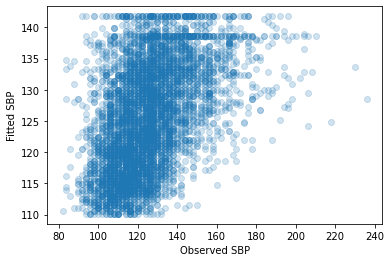

In [130]:
ax = sns.regplot(x=model.endog, y=res.fittedvalues, fit_reg=False, scatter_kws={"alpha": 0.2})
ax.set(xlabel="Observed SBP", ylabel="Fitted SBP");

#### Generalized Linear Models

Generalized Linear Models (GLM) is a broad class of regression models that can be used to capture nonlinear mean structures and non-constant variance (heteroscedasticity).  In this course we will focus on one specific GLM known as logistic regression.  Logistic regression is most often used when the response variable is binary, typically coded numerically as 0 and 1.

To illustrate logistic regression, we construct a binary variable for each NHANES subject indicating their smoking history.

In [131]:
da["smq"] = da.SMQ020.replace({2: 0, 7: np.nan, 9: np.nan})

Above is a example of creating a logistic regression model where the response variable is SMQ020x, which in this case is whether or not this person has ever been a smoker.  The predictor (explanatory) variables are age (RIDAGEYR) and gender (RIAGENDRx).

In [132]:
model = sm.GLM.from_formula("smq ~ RIDAGEYR + RIAGENDRx", family=sm.families.Binomial(), data=da)
res = model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5091
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3296.6
Date:                Sun, 29 Jan 2023   Deviance:                       6593.2
Time:                        11:08:30   Pearson chi2:                 5.10e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.6166      0.09

We will not explain the output in detail here, except to note that according to the model results, men are more likely to have smoked than women, and older people are more likely to have smoked than younger people. 

#### Generalized Estimated Equations

Generalized Estimating Equations (GEE) is not a new class of models, but rather is a new way of estimating generalized linear models (GLMs).  The GEE approach is used when the data are non-independent, which usually arises with specific types of study designs such as panel, cluster, or longitudinal designs.  In a GEE, we provide a "cluster" variable which partitions the sample into groups.  The observations are possibly correlated within a cluster but must be independent between clusters.  The resulting "marginal model" describes the relationships between the explanatory variables and the outcome, and properly accounts for the dependence among observations.

NHANES is a cluster sample, meaning that the NHANES subjects are recruited in two steps: first a representative set of communities is identified, then representative subjects within each community are identified.  In such a "cluster sample", there may be correlations between two subjects from the same community.  For confidentiality reasons, the actual communiity identifiers are not provided in the NHANES data, but we can construct a proxy for them as the "group" variable defined below.

In [133]:
da["group"] = 10*da.SDMVSTRA + da.SDMVPSU

Now that we have constructed a cluster variable, we can estimate a linear model using the GEE approach.  This linear model considers the relationship between systolic blood pressure (BPXSY1) with age and gender as explanatory variables.

In [136]:
model = sm.GEE.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx", groups="group", cov_struct=sm.cov_struct.Exchangeable(), data=da)
res = model.fit()
print(res.summary())
print(res.cov_struct.summary())

                               GEE Regression Results                              
Dep. Variable:                      BPXSY1   No. Observations:                 5102
Model:                                 GEE   No. clusters:                       30
Method:                        Generalized   Min. cluster size:                 106
                      Estimating Equations   Max. cluster size:                 226
Family:                           Gaussian   Mean cluster size:               170.1
Dependence structure:         Exchangeable   Num. iterations:                     7
Date:                     Sun, 29 Jan 2023   Scale:                         268.502
Covariance type:                    robust   Time:                         11:09:26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.7673      0.907    111.155      0.000      98.99

The analysis above shows a small correlation between two observations in the same cluster, with an intraclass correlation (ICC) of approximately 0.02.

#### Multilevel Models

Multilevel models (also known as "mixed models", "random effects models", or in some cases "variance components models") are a way to jointly model the mean and covariance structure of data in a regression framework.  It is a very powerful and broadly-useful set of tools, and we will only scratch the surface of this powerful framework in this course.  Below is a simple example that illustrates a multilevel regression using systolic blood pressure as the dependent variable, with several explanatory variables.  This model includes a "random intercept" for "group" (the survey cluster).

In [149]:
db = da[["BPXSY1", "RIDAGEYR", "RIAGENDRx", "BMXBMI", "smq", "group"]].dropna()
model = sm.MixedLM.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx + BMXBMI + smq", groups="group", data=db)
result = model.fit()
print(result.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  BPXSY1     
No. Observations:  5094     Method:              REML       
No. Groups:        30       Scale:               258.9089   
Min. group size:   106      Log-Likelihood:      -21404.3485
Max. group size:   226      Converged:           Yes        
Mean group size:   169.8                                    
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         91.769    1.271 72.208 0.000 89.278 94.260
RIAGENDRx[T.Male]  3.616    0.465  7.779 0.000  2.705  4.527
RIDAGEYR           0.466    0.013 35.599 0.000  0.440  0.491
BMXBMI             0.303    0.033  9.181 0.000  0.238  0.367
smq                0.010    0.479  0.021 0.983 -0.928  0.948
group Var          4.694    0.102                           



The statsmodels library aims to provide a uniform syntax and workflow for regression modeling in Python.  

Documentation and examples of these models can be found at the following links:

* OLS: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

* GLM: https://www.statsmodels.org/stable/glm.html

* GEE: https://www.statsmodels.org/stable/gee.html

* MIXEDLM: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

Feel free to further explore these powerful tools and their use cases.  In week 2 of this course you will see examples of OLS and GLM, and in week 3 we will introduce GEE and MIXEDLM.